In [40]:
#!git clone https://github.com/edliu2/UsedCarsProject.git
import pandas
import numpy as np
try:
    df = pandas.read_csv('UsedCarsProject/autos.csv', sep=",", encoding = 'Latin1')
except:
    df = pandas.read_csv('autos.csv', sep=",", encoding = 'Latin1')

df = df.drop(['brand', 'model', 'name','seller', 'abtest', 'offerType', 'nrOfPictures', 'lastSeen', 'abtest', 'postalCode', 'dateCreated', 'dateCrawled'], axis=1)

display(df)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage
0,480,NaN,1993,manuell,0,150000,0,benzin,NaN
1,18300,coupe,2011,manuell,190,125000,5,diesel,ja
2,9800,suv,2004,automatik,163,125000,8,diesel,NaN
3,1500,kleinwagen,2001,manuell,75,150000,6,benzin,nein
4,3600,kleinwagen,2008,manuell,69,90000,7,diesel,nein
...,...,...,...,...,...,...,...,...,...
371523,2200,NaN,2005,NaN,0,20000,1,NaN,NaN
371524,1199,cabrio,2000,automatik,101,125000,3,benzin,nein
371525,9200,bus,1996,manuell,102,150000,3,diesel,nein
371526,3400,kombi,2002,manuell,100,150000,6,diesel,NaN


In [0]:
# Eliminating outliers that do not make sense
df_removed_outliers = df[
                         (df['powerPS'] > 0) & (df['powerPS'] <= 1500)
                         & (df['yearOfRegistration'] >= 1900) & (df['yearOfRegistration'] < 2020)
                         & (df['price'] > 10) & (df['price'] < 1e6)
                      ]

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,322771.000000,322771.000000,322771.000000,322771.000000,322771.000000
mean,6316.325237,2003.608199,126.477063,125516.062472,5.979939
std,11478.876584,7.211519,65.602833,39298.922014,3.586419
min,11.000000,1910.000000,1.000000,5000.000000,0.000000
25%,1400.000000,1999.000000,80.000000,100000.000000,3.000000
50%,3495.000000,2004.000000,116.000000,150000.000000,6.000000
75%,7950.000000,2008.000000,150.000000,150000.000000,9.000000
max,999999.000000,2019.000000,1500.000000,150000.000000,12.000000


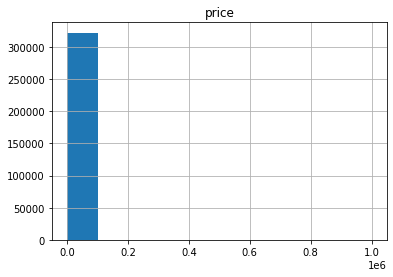

In [42]:
df_removed_outliers.hist(column='price')
df_removed_outliers.describe()

In [0]:
# Replace price by column log_price as it is highly right-skewed
log_price = np.log10(df_removed_outliers['price'])
log_price.name = 'log_price'
df_log = pandas.concat([log_price, df_removed_outliers], axis=1).drop(['price'], axis=1)

In [44]:
# Translating categorical variables to 0 and 1 values, and one-hot encoding the rest
df = df_log
df['gearbox'].loc[df['gearbox'] == 'manuell'] = 1
df['gearbox'].loc[df['gearbox'] == 'automatik'] = 0
df = df.dropna(axis=0, subset=['gearbox'])

df['notRepairedDamage'].loc[df['notRepairedDamage'] == 'ja'] = 1
df['notRepairedDamage'].loc[df['notRepairedDamage'] == 'nein'] = 0
df = df.dropna(axis=0, subset=['notRepairedDamage'])

# One hot encoding, using drop_first to not introduce redundant columns
cats = pandas.get_dummies(df[['vehicleType', 'fuelType']], drop_first=True)
df = df.drop(['vehicleType', 'fuelType'], axis = 1)
years_old = 2016 - df['yearOfRegistration']
years_old.name ='years_old'
df = df.drop(['yearOfRegistration'], axis = 1)
df = pandas.concat([df, cats, years_old], axis = 1)
display(df)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,log_price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,years_old
1,4.262451,1,190,125000,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,5
3,3.176091,1,75,150000,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,15
4,3.556303,1,69,90000,7,0,0,0,0,1,0,0,0,0,0,1,0,0,0,8
5,2.812913,1,102,150000,10,1,0,0,0,0,0,1,0,1,0,0,0,0,0,21
6,3.342423,1,109,150000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371519,3.720159,0,150,150000,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
371520,3.505150,1,225,150000,5,1,0,0,0,0,0,1,0,1,0,0,0,0,0,12
371524,3.078819,0,101,125000,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,16
371525,3.963788,1,102,150000,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,20


In [45]:
df.to_csv('processed_without_modelbrand.csv', index='False')
print(df)


        log_price gearbox  powerPS  ...  fuelType_hybrid  fuelType_lpg years_old
1        4.262451       1      190  ...                0             0         5
3        3.176091       1       75  ...                0             0        15
4        3.556303       1       69  ...                0             0         8
5        2.812913       1      102  ...                0             0        21
6        3.342423       1      109  ...                0             0        12
...           ...     ...      ...  ...              ...           ...       ...
371519   3.720159       0      150  ...                0             0         0
371520   3.505150       1      225  ...                0             0        12
371524   3.078819       0      101  ...                0             0        16
371525   3.963788       1      102  ...                0             0        20
371527   4.462248       1      320  ...                0             0         3

[271997 rows x 20 columns]


In [0]:
#This can be in a different notebook in the same directory as above. I am just having
#some trouble with collab reading files from the same directory

#Multiple Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('processed_without_modelbrand.csv')

X = pd.DataFrame(dataset.iloc[:,2:].values) #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = pd.DataFrame(dataset.iloc[:,1].values)
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# define new class for pipeline that passes feature importance or coef to RFE
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self

lin_pipeline =  PipelineRFE([
                    ('scale', StandardScaler()), 
                    ('lr', LinearRegression())
                     ], verbose=True)

# on Colab this seems to hang if n_jobs != 1
# grid search on number of features to maximize (- MSE)
selectionObj = RFECV(lin_pipeline, step=5, cv=10, scoring='neg_mean_squared_error', n_jobs=1, verbose=10)
selectionObj.fit(X_train, y_train)
print("Optimal number of features : %d" % selectionObj.n_features_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 19 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.1s
Fitting estimator with 14 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.1s
Fitting estimator with 9 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
Fitting estimator with 4 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
Fitting estimator with 19 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.1s
[Pipeline] ................ (step 2 of 2)

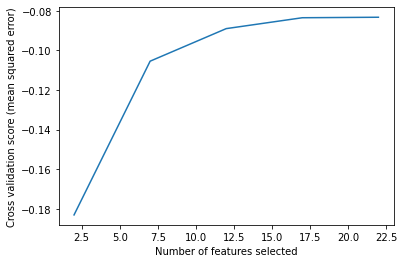

In [80]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean squared error)")
plt.plot(range(2, 5*len(selectionObj.grid_scores_) + 2, 5), selectionObj.grid_scores_)
plt.show()

In [82]:
#Optimal model uses all available features

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')


In [98]:
y_pred = selectionObj.predict(X_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(10**y_test)
print(10**y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

0.08338053768717646
              0
85971    1300.0
205804  10900.0
13374    8200.0
235012  11000.0
169522   1150.0
...         ...
16494    4500.0
259055   2500.0
24516   12800.0
13263    7500.0
25001    3500.0

[81600 rows x 1 columns]
[ 1197.05341125 10906.88459686  7594.79170468 ...  9188.86062566
  9175.23183614  1983.92382164]
11816534387.023874


In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [102]:
from sklearn.tree import DecisionTreeRegressor
regObj = DecisionTreeRegressor()
regObj.fit(X_train,y_train) 
y_pred = regObj.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

print(y_pred)
print(y_test)

0.06192871897675508
[2.99583882 4.1256743  3.95292019 ... 4.14612804 4.25527251 3.54406804]
               0
85971   3.113943
205804  4.037426
13374   3.913814
235012  4.041393
169522  3.060698
...          ...
16494   3.653213
259055  3.397940
24516   4.107210
13263   3.875061
25001   3.544068

[81600 rows x 1 columns]
